# Along Isopycnals

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
from flox.xarray import xarray_reduce
import gsw

In [2]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import density_funcs as df
import plot_funcs as pf

In [3]:
from importlib import reload
reload(df)
reload(pf)

<module 'plot_funcs' from '/home/amf2288/argo-intern/funcs/plot_funcs.py'>

In [4]:
# Set title size
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16  # Titles larger

# Set axis label size
plt.rcParams['axes.labelsize'] = 14  # Labels slightly smaller

# Data wrangling

## Create ds_binned

In [5]:
ds = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/new_test.nc', chunks={'N_PROF':10000})
ds = ds.assign_attrs({"Fetched_uri":''})
unique_prof = np.arange(len(ds['N_PROF']))
ds = ds.assign_coords(N_PROF=('N_PROF', unique_prof))

In [6]:
%%time
sample_max = 2.5
ds = ds.sortby('LATITUDE').persist()
boolean_indexer = (ds.sample_rate < sample_max).compute()
ds = ds.where(boolean_indexer, drop=True)

CPU times: user 5min 8s, sys: 5min 52s, total: 11min 1s
Wall time: 18min 36s


In [21]:
%%time
ds.to_netcdf('/swot/SUM05/amf2288/sync-boxes/ds_high_res_1.nc')

CPU times: user 1min 54s, sys: 5min 15s, total: 7min 9s
Wall time: 3min 3s


In [23]:
%%time
xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/ds_high_res_1.nc')

CPU times: user 30.8 ms, sys: 27.7 ms, total: 58.5 ms
Wall time: 54.9 ms


<xarray.Dataset> Size: 95GB
Dimensions:            (N_PROF: 1488063, PRES_INTERPOLATED: 1001)
Coordinates:
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 8kB 0 2 4 6 ... 1996 1998 2000
    TIME               (N_PROF) datetime64[ns] 12MB ...
    LATITUDE           (N_PROF) float64 12MB ...
    LONGITUDE          (N_PROF) float64 12MB ...
  * N_PROF             (N_PROF) int64 12MB 2428701 1114461 ... 1502504 411205
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 12GB ...
    CYCLE_NUMBER       (N_PROF, PRES_INTERPOLATED) float64 12GB ...
    PLATFORM_NUMBER    (N_PROF, PRES_INTERPOLATED) float64 12GB ...
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6GB ...
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 6GB ...
    SA                 (N_PROF, PRES_INTERPOLATED) float64 12GB ...
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 12GB ...
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 6GB ...
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 6GB ...
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 12GB ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://data-argo.ifremer.fr
    Fetched_by:           amf2288
    Fetched_date:         2025/03/11
    Fetched_constraints:  [x=0.00/5.00; y=40.00/45.00; z=0.0/2002.0]
    Fetched_uri:          
    Valid uris:           ['https://data-argo.ifremer.fr/dac/coriolis/6903068...
    All uris:             ['https://data-argo.ifremer.fr/dac/coriolis/6903068...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

In [7]:
ds

<xarray.Dataset> Size: 119GB
Dimensions:            (N_PROF: 1488063, PRES_INTERPOLATED: 1001)
Coordinates:
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 8kB 0 2 4 6 ... 1996 1998 2000
    TIME               (N_PROF) datetime64[ns] 12MB 2024-01-31T06:16:20 ... 2...
    LATITUDE           (N_PROF) float64 12MB -78.16 -78.15 ... 89.77 89.78
    LONGITUDE          (N_PROF) float64 12MB -174.6 -161.6 ... -99.35 139.1
  * N_PROF             (N_PROF) int64 12MB 2428701 1114461 ... 1502504 411205
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 12GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    CYCLE_NUMBER       (N_PROF, PRES_INTERPOLATED) float64 12GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    DATA_MODE          (N_PROF, PRES_INTERPOLATED) object 12GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    DIRECTION          (N_PROF, PRES_INTERPOLATED) object 12GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    PLATFORM_NUMBER    (N_PROF, PRES_INTERPOLATED) float64 12GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 6GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    SA                 (N_PROF, PRES_INTERPOLATED) float64 12GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 12GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 6GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 6GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 12GB dask.array<chunksize=(9964, 1001), meta=np.ndarray>
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://data-argo.ifremer.fr
    Fetched_by:           amf2288
    Fetched_date:         2025/03/11
    Fetched_constraints:  [x=0.00/5.00; y=40.00/45.00; z=0.0/2002.0]
    Fetched_uri:          
    Valid uris:           ['https://data-argo.ifremer.fr/dac/coriolis/6903068...
    All uris:             ['https://data-argo.ifremer.fr/dac/coriolis/6903068...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

In [ ]:
ds = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/high_res.nc', chunks={'N_PROF':10000})

In [ ]:
ds

<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_61156/218986346.py:26: SyntaxWarning: invalid escape sequence '\c'
  ax2.set_title('All Argo Profiles, $1^\circ$ x $1^\circ$ bins')


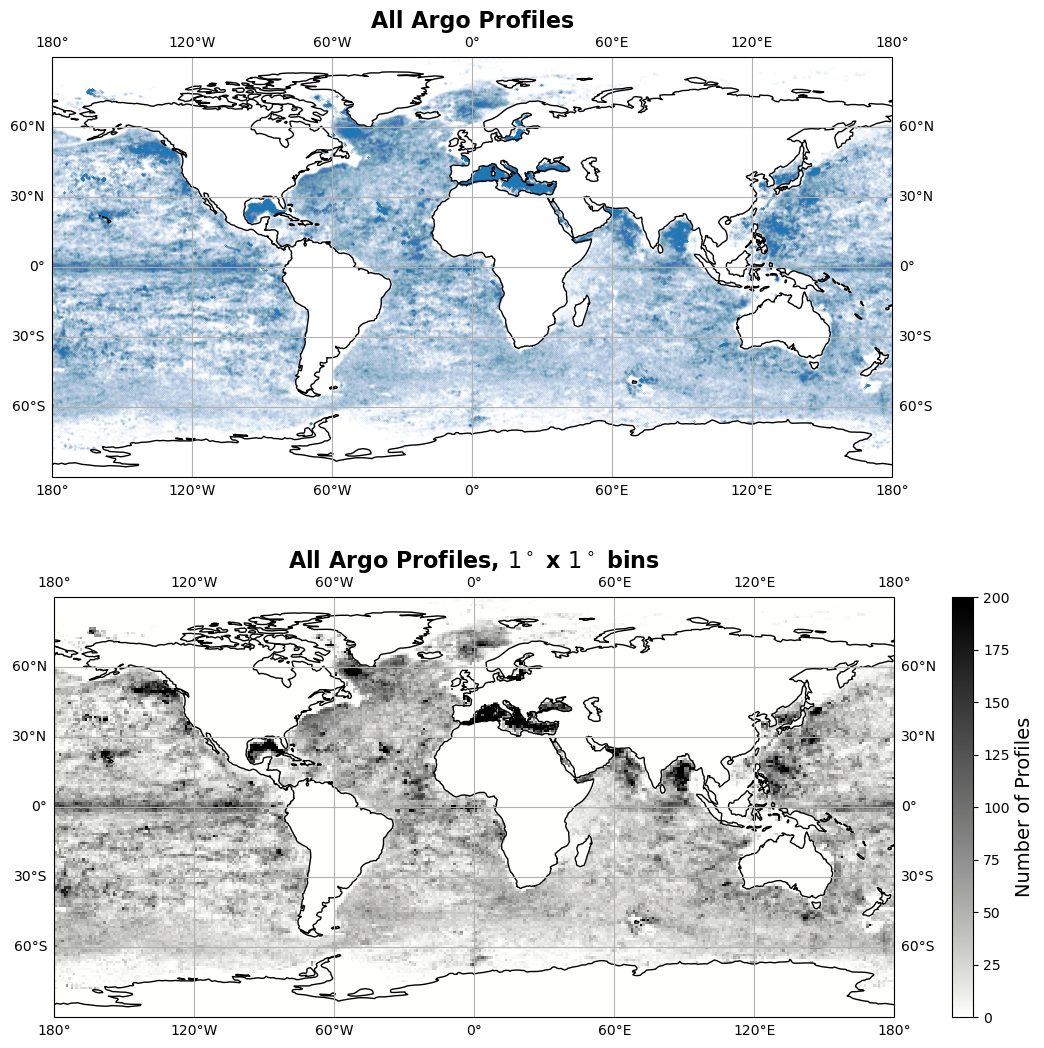

In [8]:
fig=plt.figure(figsize=(15,12))
ax1 = plt.subplot(211,projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_global()
ax1.scatter(ds.LONGITUDE,ds.LATITUDE,transform=ccrs.PlateCarree(),color='tab:blue',s=0.0001)
ax1.set_title('All Argo Profiles');

ax2 = plt.subplot(212,projection=ccrs.PlateCarree())
lon_edges = np.arange(-180, 181, 1)
lat_edges = np.arange(-90, 91, 1)
heatmap, _, _ = np.histogram2d(ds.LATITUDE.values, ds.LONGITUDE.values, bins=[lat_edges, lon_edges])
lon_centers = (lon_edges[:-1] + lon_edges[1:]) / 2
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
X, Y = np.meshgrid(lon_centers, lat_centers)
start = 0
end   = 200
norm  = colors.Normalize(vmin=start, vmax=end)
cmap  = cmo.gray_r
heatmap_plot = ax2.pcolormesh(X, Y, heatmap, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
cbar = plt.colorbar(heatmap_plot, ax=ax2, orientation='vertical')#, shrink=0.5)
cbar.set_label('Number of Profiles')
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_global()
ax2.set_title('All Argo Profiles, $1^\circ$ x $1^\circ$ bins')

pos1 = ax1.get_position()
ax1.set_position([pos1.x0 - 0.049, pos1.y0+0.03, pos1.width, pos1.height])

In [9]:
lon_bins = np.arange(-180,181,1)
lat_bins = np.arange(-90,91,1)

In [10]:
numeric_vars = [var for var in ds if np.issubdtype(ds[var].dtype, np.number)]
ds = ds[numeric_vars]

In [11]:
def get_ds_binned(ds, lon_bins, lat_bins):
    
    ds_binned = xarray_reduce(
    ds,
    'LONGITUDE',
    'LATITUDE',
    func='mean',
    expected_groups=(
        pd.IntervalIndex.from_breaks(lon_bins),
        pd.IntervalIndex.from_breaks(lat_bins)
    ),
    fill_value=np.nan,
    skipna=True)
    
    lon_l = np.arange(lon_bins[0],lon_bins[-1],1)
    lon_r = np.arange(lon_bins[1],lon_bins[-1]+1,1)
    lon_c = (lon_l + lon_r)/2

    lat_l = np.arange(lat_bins[0],lat_bins[-1],1)
    lat_r = np.arange(lat_bins[1],lat_bins[-1]+1,1)
    lat_c = (lat_l + lat_r)/2

    ds_binned = ds_binned.assign_coords({
        "lat_c": ("LATITUDE_bins", lat_c),
        "lat_l": ("LATITUDE_bins", lat_l),
        "lat_r": ("LATITUDE_bins", lat_r),
        "lon_c": ("LONGITUDE_bins", lon_c),
        "lon_l": ("LONGITUDE_bins", lon_l),
        "lon_r": ("LONGITUDE_bins", lon_r),
    })
    
    ds_binned = ds_binned.swap_dims({"LATITUDE_bins": "lat_c", "LONGITUDE_bins": "lon_c"})
    ds_binned = ds_binned.drop_vars(["LATITUDE_bins", "LONGITUDE_bins"])
    
    if isinstance(ds_binned, xr.Dataset):
        # For xarray.Dataset, use rename_dims and rename_vars
        ds_binned = ds_binned.rename_dims({"PRES_INTERPOLATED": "z_c"}).rename_vars({"PRES_INTERPOLATED": "z_c"})
    elif isinstance(ds_binned, xr.DataArray):
        # For xarray.DataArray, use rename to rename the dimension
        ds_binned = ds_binned.rename({"PRES_INTERPOLATED": "z_c"})
    else:
        raise TypeError("Input must be an xarray.Dataset or xarray.DataArray")

    
    return ds_binned

In [12]:
ds_binned = get_ds_binned(ds, lon_bins, lat_bins)

In [13]:
%%time
ds_binned = ds_binned.chunk({'z_c':20}).load()

CPU times: user 28min 7s, sys: 53min 23s, total: 1h 21min 30s
Wall time: 7min 20s


In [ ]:
ds_binned.to_netcdf('/swot/SUM05/amf2288/sync-boxes/globe_binned_high_res_z_1.nc')

## Load ds_binned and plot

In [ ]:
ds_binned = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/globe_binned_high_res_z_1.nc', chunks={'z_c':20}).load()

In [14]:
depth = 1000
ds_sel = ds_binned.sel(z_c=depth, method='nearest').compute()

In [15]:
lon = -25
ds_sect = ds_binned.sel(lon_c=lon, method='nearest').compute()

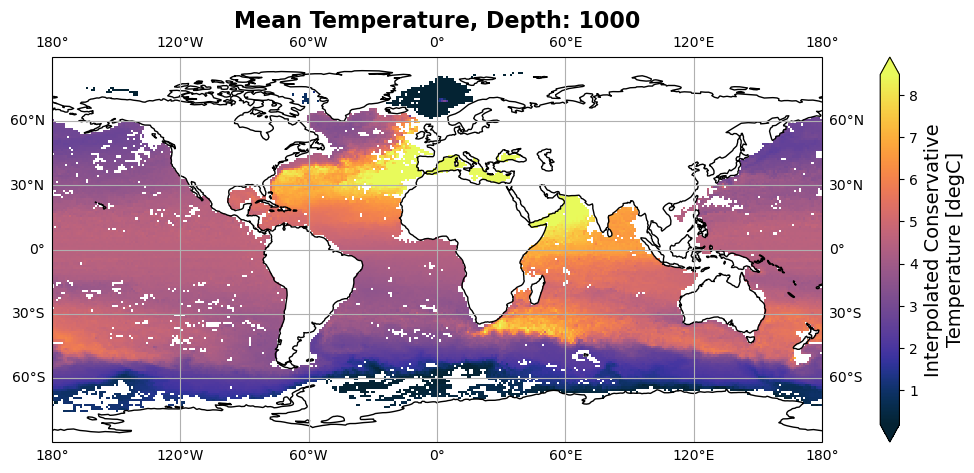

In [16]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_sel.CT.plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.thermal, robust=True)
ax.set_title('Mean Temperature, Depth: {}'.format(depth));

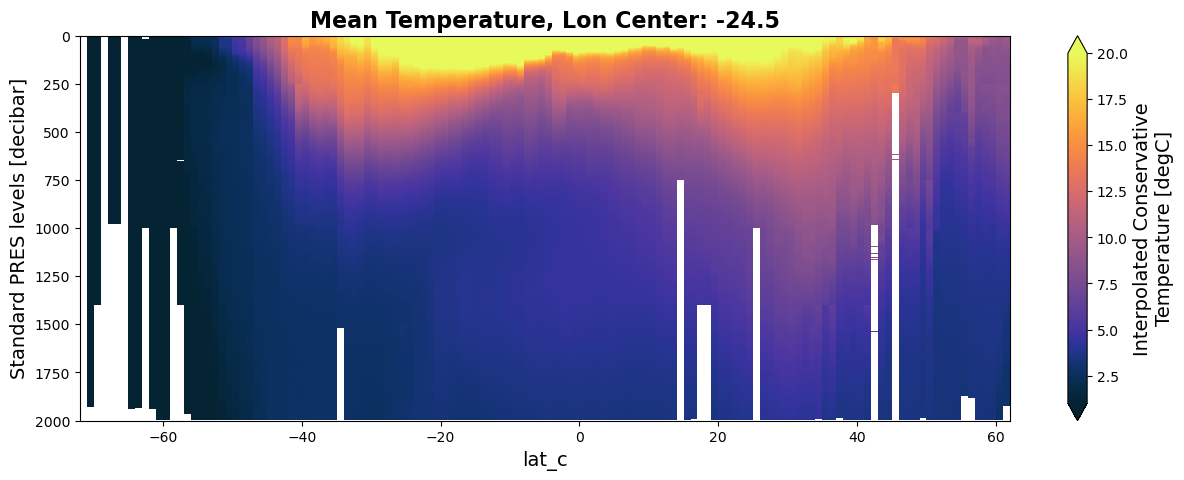

In [17]:
fig=plt.figure(figsize=(15,5))
ds_sect.CT.plot(x='lat_c',y='z_c', cmap=cmo.thermal, vmin=1, vmax=20)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.title('Mean Temperature, Lon Center: {}'.format(ds_sect.lon_c.values));

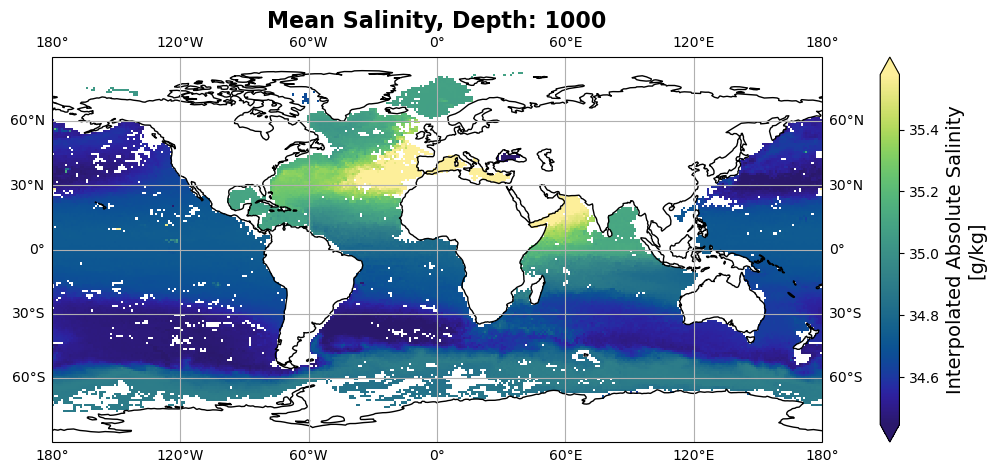

In [26]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_sel.SA.plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.haline, robust=True)
ax.set_title('Mean Salinity, Depth: {}'.format(depth));

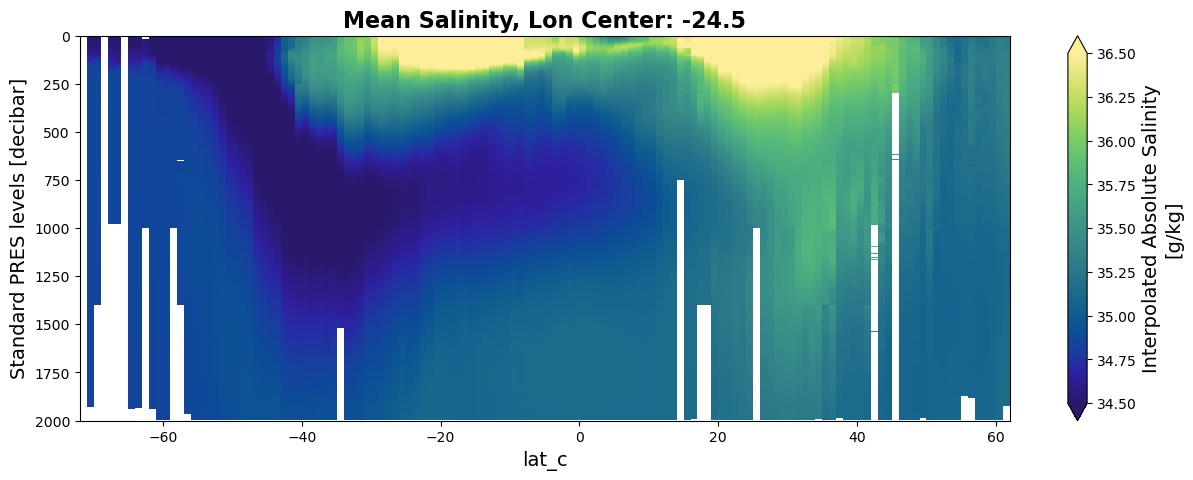

In [27]:
fig=plt.figure(figsize=(15,5))
ds_sect.SA.plot(x='lat_c',y='z_c', cmap=cmo.haline, vmin=34.5, vmax=36.5)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.title('Mean Salinity, Lon Center: {}'.format(ds_sect.lon_c.values));

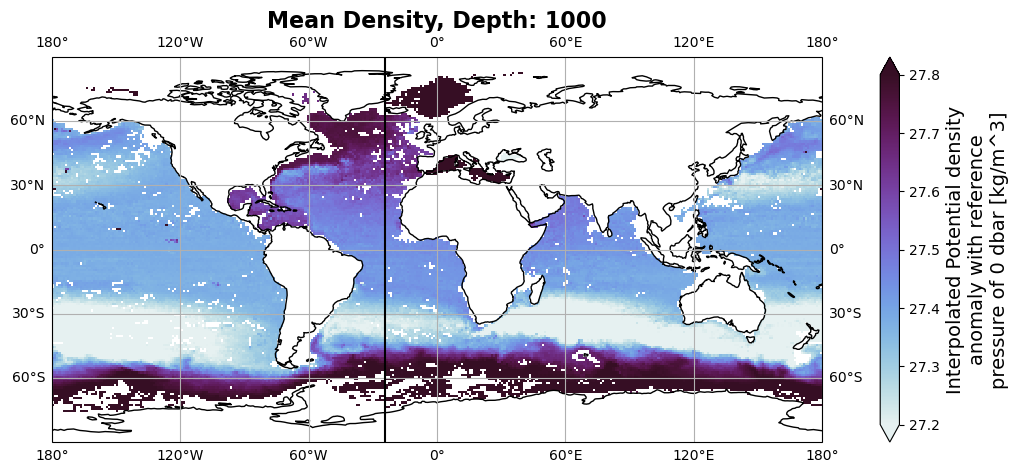

In [28]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ax.axvline(-24.5, color='k')
ds_sel.SIG0.plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.dense, vmin=27.2, vmax=27.8)
ax.set_title('Mean Density, Depth: {}'.format(depth));

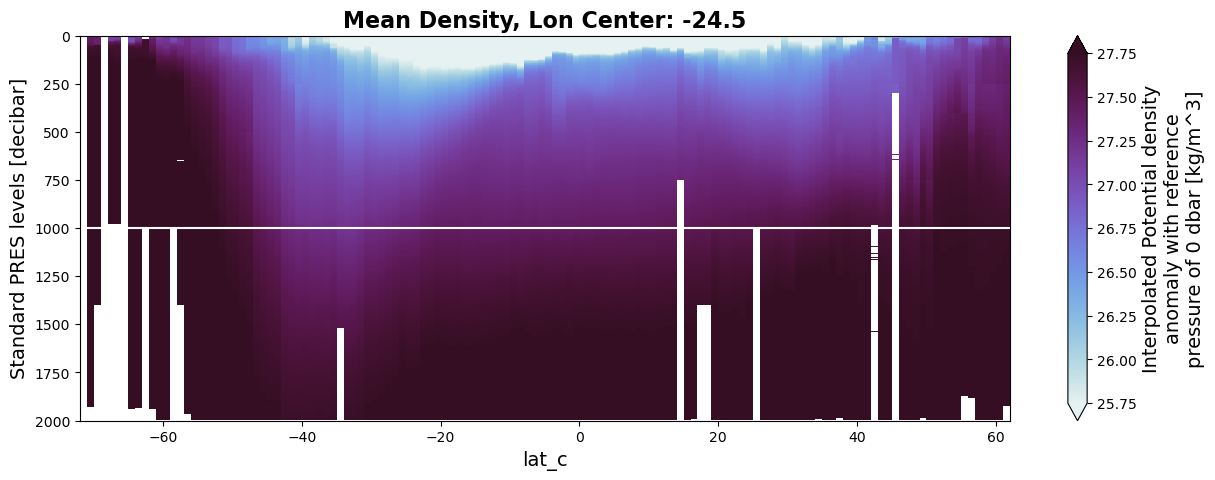

In [29]:
fig=plt.figure(figsize=(15,5))
ds_sect.SIG0.plot(x='lat_c',y='z_c', cmap=cmo.dense, vmin=25.75, vmax=27.75)
plt.gca().invert_yaxis()
plt.axhline(depth, color='w')
plt.xlim(-72,62)
plt.title('Mean Density, Lon Center: {}'.format(ds_sect.lon_c.values));

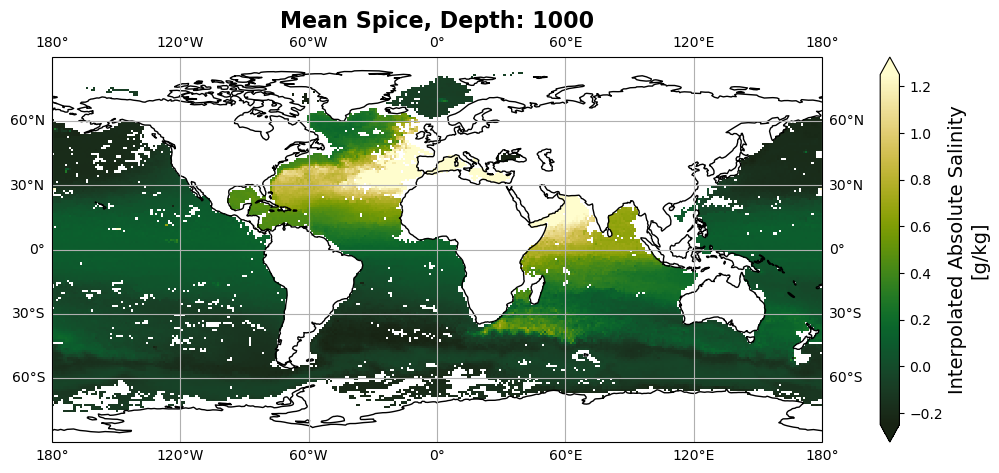

In [30]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_sel.SPICE.plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.speed_r, vmin=-0.25, vmax=1.25)
ax.set_title('Mean Spice, Depth: {}'.format(depth));

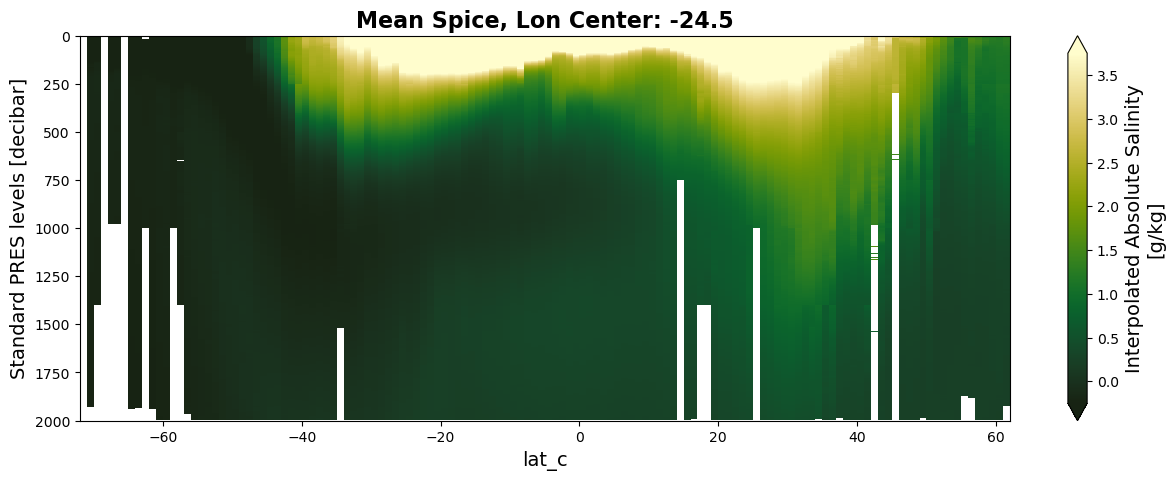

In [31]:
fig=plt.figure(figsize=(15,5))
ds_sect.SPICE.plot(x='lat_c',y='z_c', cmap=cmo.speed_r, vmin=-0.25, vmax=3.75)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.title('Mean Spice, Lon Center: {}'.format(ds_sect.lon_c.values));

## Create ds_rho

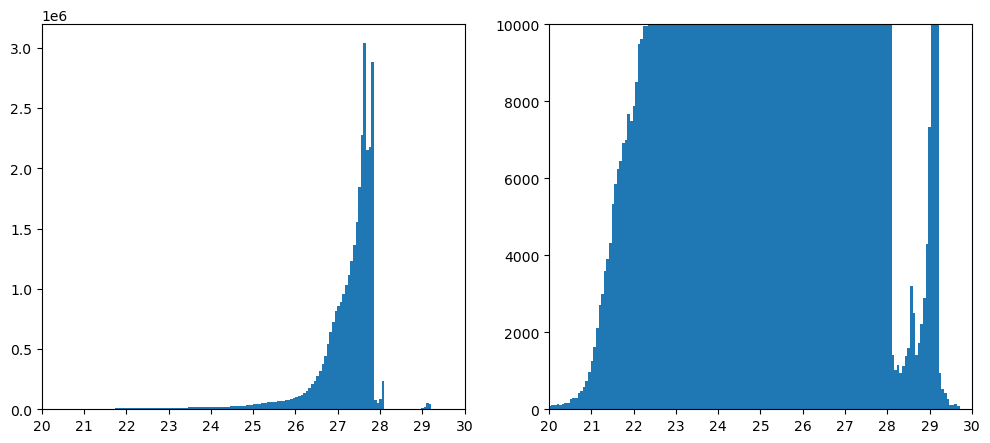

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.hist(ds_binned.SIG0.values.flatten(), bins=500)
plt.xlim(20,30)
plt.xticks(ticks=np.arange(20,31,1),labels=np.arange(20,31,1));

plt.subplot(122)
plt.hist(ds_binned.SIG0.values.flatten(), bins=500)
plt.xlim(20,30)
plt.ylim(0,1e4)
plt.xticks(ticks=np.arange(20,31,1),labels=np.arange(20,31,1));

In [33]:
rho_grid = np.arange(21,29,0.0025)

In [34]:
len(rho_grid)

3200

In [35]:
%%time
ds_binned = ds_binned.chunk({"lon_c": 20, "lat_c": 20, "z_c":1001}).load()

CPU times: user 10.8 s, sys: 4.8 s, total: 15.6 s
Wall time: 15.6 s


In [ ]:
%%time
ds_rho = df.density_interp_binned(ds_binned, rho_grid)

In [ ]:
sample_rate_diff = ds.sample_rate.values.flatten()
z_c_diff = ds_rho.z_c.diff(dim='density').values.flatten()
pres_diff = ds_rho.PRES.diff(dim='density').values.flatten()

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.hist(sample_rate_diff, bins = 100, range=(0,100))
plt.title('Sample rate of floats')
plt.xlabel('Sample Rate (m)')

plt.subplot(122)
plt.hist(sample_rate_diff, bins = np.arange(0,15,1))
plt.title('Sample rate of floats')
plt.xlabel('Sample Rate (m)')

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.hist(z_c_diff, bins=100, range=(0, 15))
plt.title('Distance between depths in ds_rho')
plt.xlabel('depth(m)')

plt.subplot(122)
plt.hist(z_c_diff, bins=100, range=(0, 15))
plt.title('Distance between depths in ds_rho')
plt.xlabel('depth(m)')
plt.yscale('log')

In [ ]:
ds_rho = ds_rho.rename({'rho_grid':'density'})

In [ ]:
ds_rho.to_netcdf('/swot/SUM05/amf2288/sync-boxes/globe_binned_rho.nc')

## Load ds_rho and plot

In [443]:
ds_rho = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/globe_binned_rho.nc', chunks={'density':50})

In [ ]:
ds_rho_sect = ds_rho.sel(lon_c=lon, method='nearest').load()

In [ ]:
density = 27.5
top, mid, bot = 22, 26.5, 28

In [ ]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ax.axvline(-24.5, color='k')
ds_rho.sel(density=density, method='nearest').z_c.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.dense, vmin=0, vmax=2000)
ax.set_title('Mean Depth, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

In [ ]:
fig=plt.figure(figsize=(15,7))

ax1 = fig.add_axes([0,0.75,0.5,0.3])
ds_rho_sect.z_c.plot(x='lat_c',y='density', cmap=cmo.dense, robust=True)
plt.gca().invert_yaxis()
ax1.set_ylim(mid,top)
ax1.set_xticks([])
ax1.set_xlabel('')
plt.title('Salinity')

ax2 = fig.add_axes([0,0,0.5,0.7])
ds_rho_sect.z_c.plot(x='lat_c',y='density', cmap=cmo.dense, robust=True)
plt.gca().invert_yaxis()
ax2.set_ylim(bot,mid)

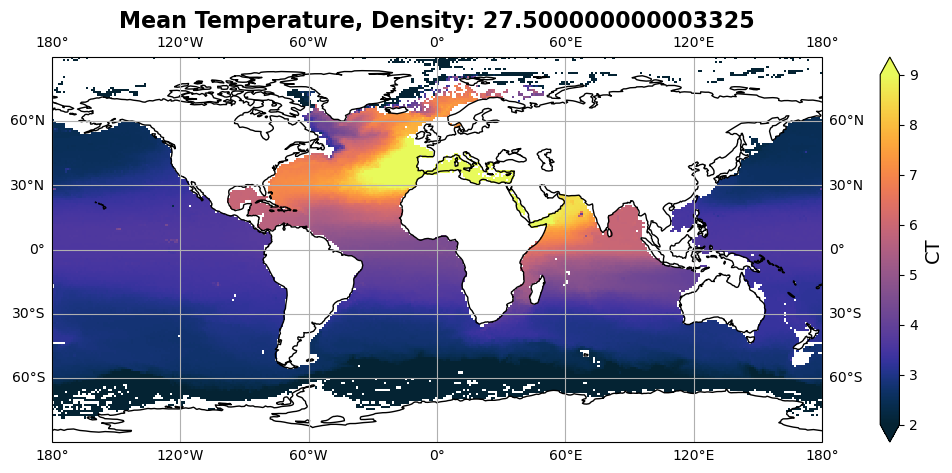

In [190]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_rho.sel(density=density, method='nearest').CT.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.thermal, vmin=2, vmax=9)
ax.set_title('Mean Temperature, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

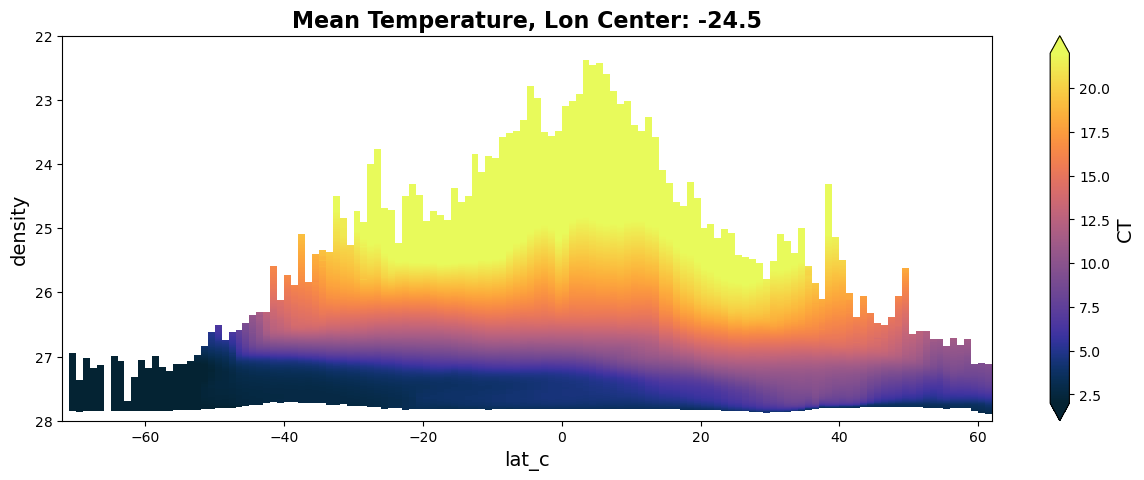

In [395]:
fig=plt.figure(figsize=(15,5))
ds_rho_sect.CT.plot(x='lat_c',y='density', cmap=cmo.thermal, vmin=2, vmax=22)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('Mean Temperature, Lon Center: {}'.format(ds_sect.lon_c.values));

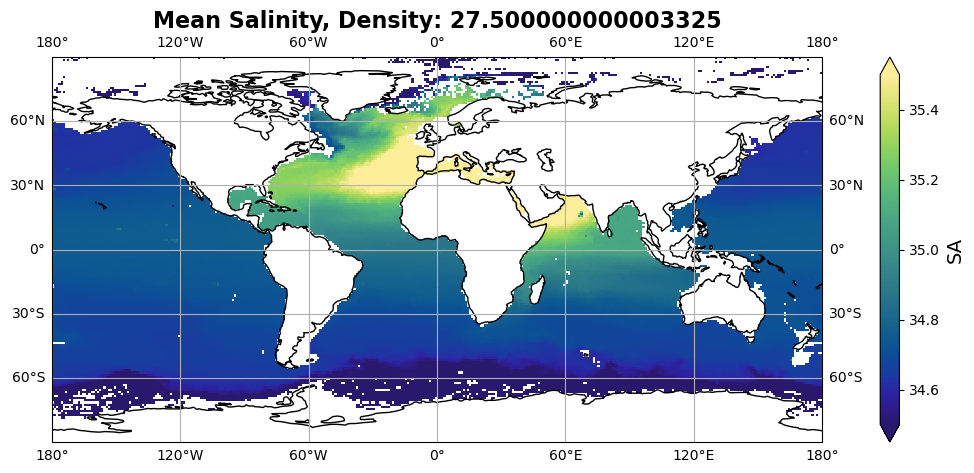

In [188]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_rho.sel(density=density, method='nearest').SA.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.haline, vmin=34.5, vmax=35.5) 
ax.set_title('Mean Salinity, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

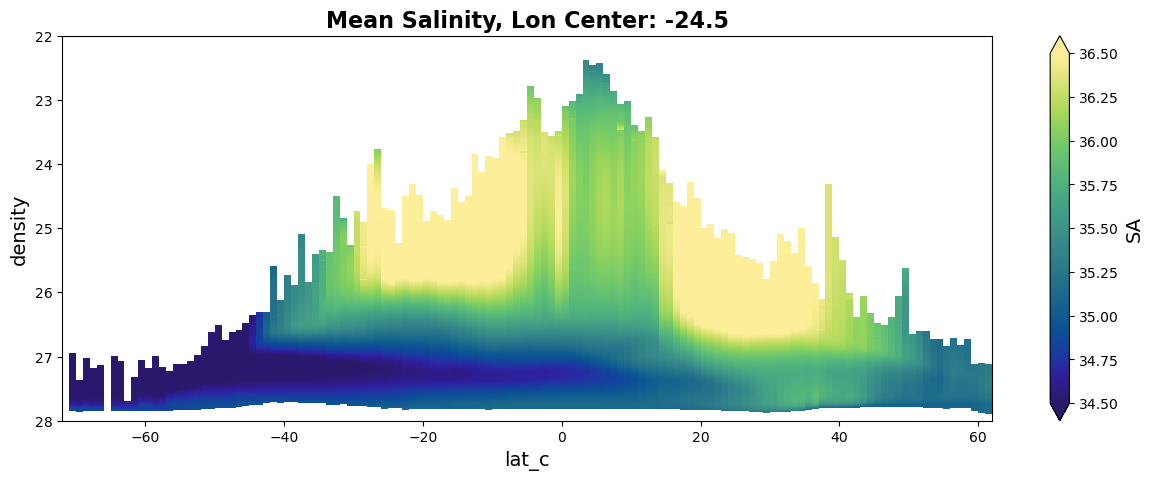

In [396]:
fig=plt.figure(figsize=(15,5))
ds_rho_sect.SA.plot(x='lat_c',y='density', cmap=cmo.haline, vmin=34.5, vmax=36.5)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('Mean Salinity, Lon Center: {}'.format(ds_sect.lon_c.values));

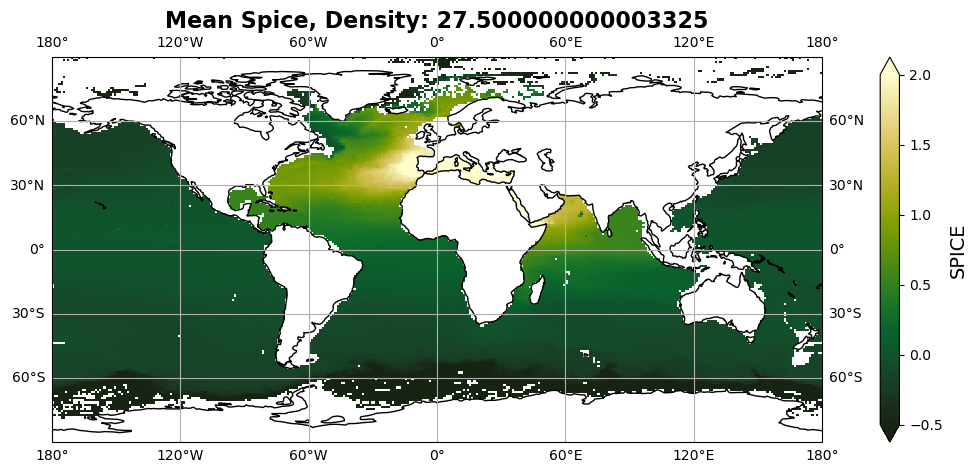

In [198]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_rho.sel(density=density, method='nearest').SPICE.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.speed_r, vmin=-0.5, vmax=2)
ax.set_title('Mean Spice, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

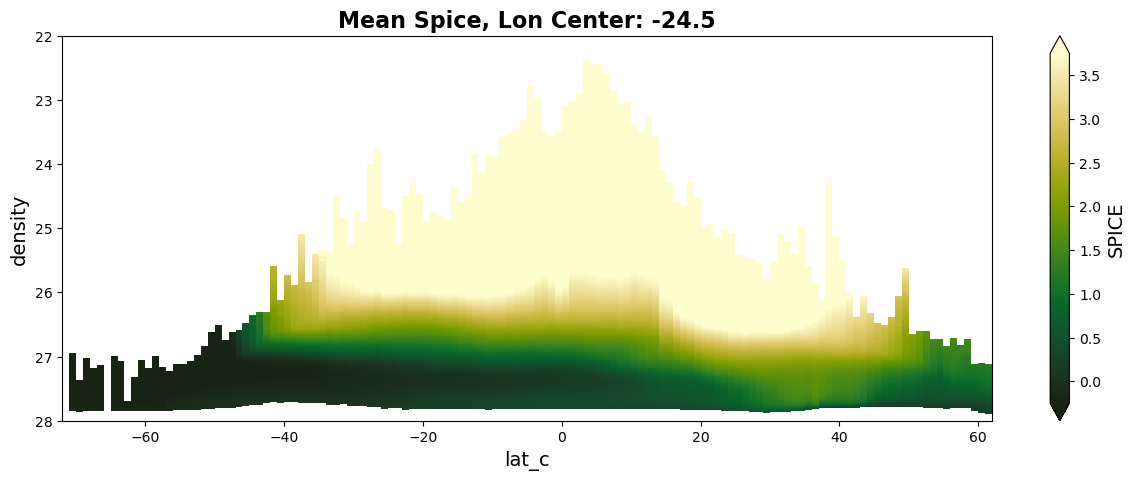

In [397]:
fig=plt.figure(figsize=(15,5))
ds_rho_sect.SPICE.plot(x='lat_c',y='density', cmap=cmo.speed_r, vmin=-0.25, vmax=3.75)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('Mean Spice, Lon Center: {}'.format(ds_sect.lon_c.values));

# Calculate Lateral Gradeints

In [142]:
dCT_dx = ds_rho.CT.differentiate('lon_c').compute()
dCT_dy = ds_rho.CT.differentiate('lat_c').compute()

In [143]:
dSA_dx = ds_rho.SA.differentiate('lon_c').compute()
dSA_dy = ds_rho.SA.differentiate('lat_c').compute()

In [144]:
dSPICE_dx = ds_rho.SPICE.differentiate('lon_c').compute()
dSPICE_dy = ds_rho.SPICE.differentiate('lat_c').compute()

In [171]:
density = 27.5

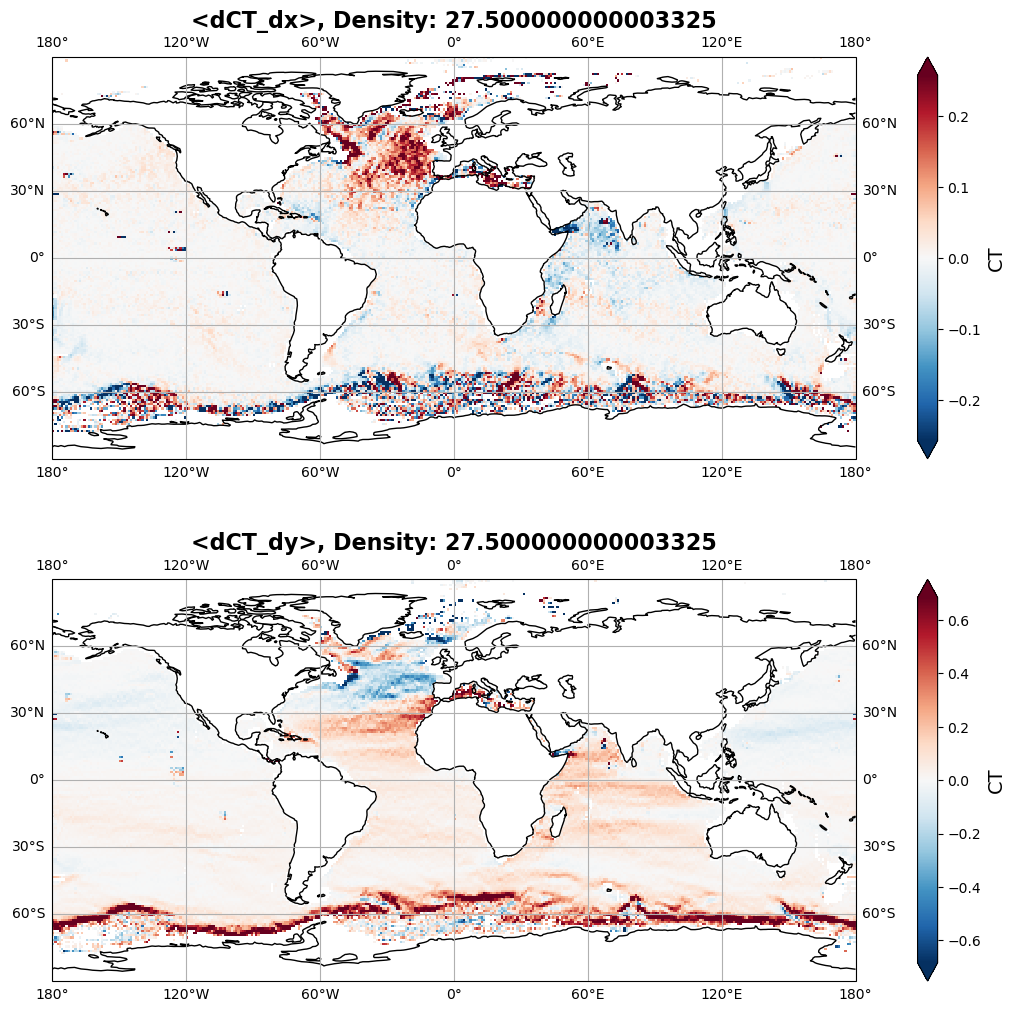

In [248]:
fig=plt.figure(figsize=(16,12))
ax1 = plt.subplot(211, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_global()
dCT_dx.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax1,transform=ccrs.PlateCarree(), robust=True)
ax1.set_title('<dCT_dx>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

ax2 = plt.subplot(212, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_global()
dCT_dy.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax2,transform=ccrs.PlateCarree(), robust=True)
ax2.set_title('<dCT_dy>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

plt.subplots_adjust(hspace=0.3)

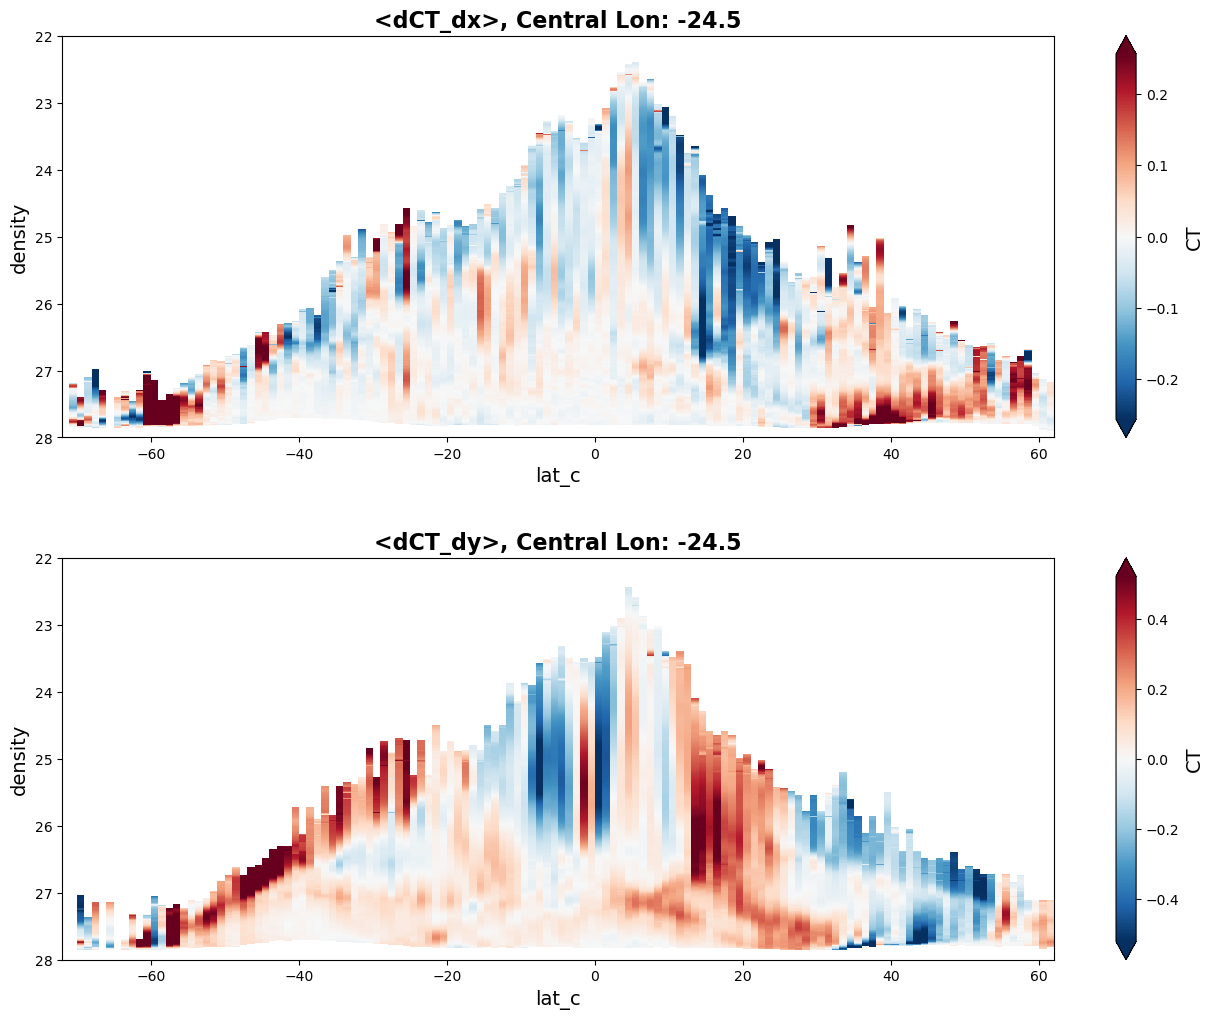

In [401]:
fig=plt.figure(figsize=(16,12))
plt.subplot(211)
dCT_dx.sel(lon_c=lon, method='nearest').plot(x='lat_c',y='density', robust=True)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('<dCT_dx>, Central Lon: {}'.format(dCT_dx.sel(lon_c=lon, method='nearest').lon_c.values))

plt.subplot(212)
dCT_dy.sel(lon_c=lon, method='nearest').plot(x='lat_c',y='density', robust=True)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('<dCT_dy>, Central Lon: {}'.format(dCT_dx.sel(lon_c=lon, method='nearest').lon_c.values))

plt.subplots_adjust(hspace=0.3)

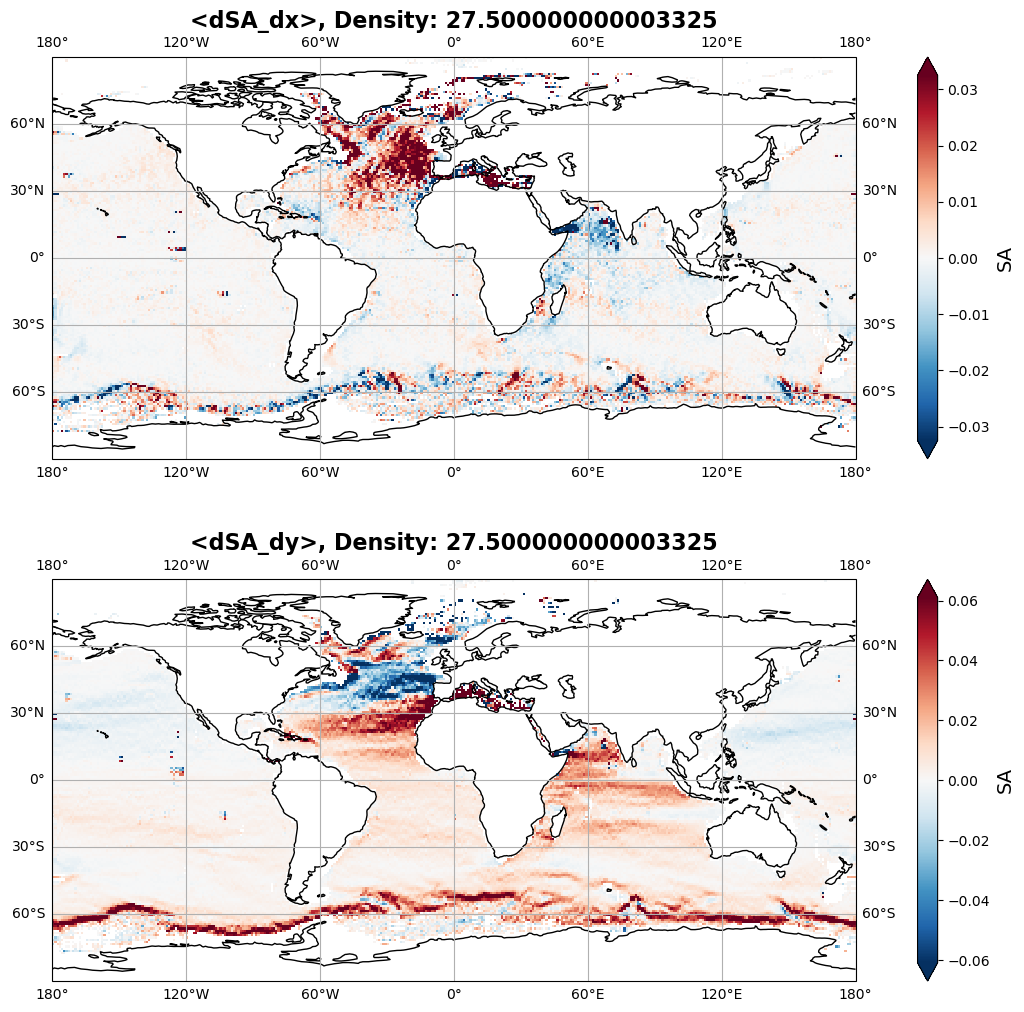

In [249]:
fig=plt.figure(figsize=(16,12))
ax1 = plt.subplot(211, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_global()
dSA_dx.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax1,transform=ccrs.PlateCarree(), robust=True)
ax1.set_title('<dSA_dx>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

ax2 = plt.subplot(212, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_global()
dSA_dy.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax2,transform=ccrs.PlateCarree(), robust=True)
ax2.set_title('<dSA_dy>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

plt.subplots_adjust(hspace=0.3)

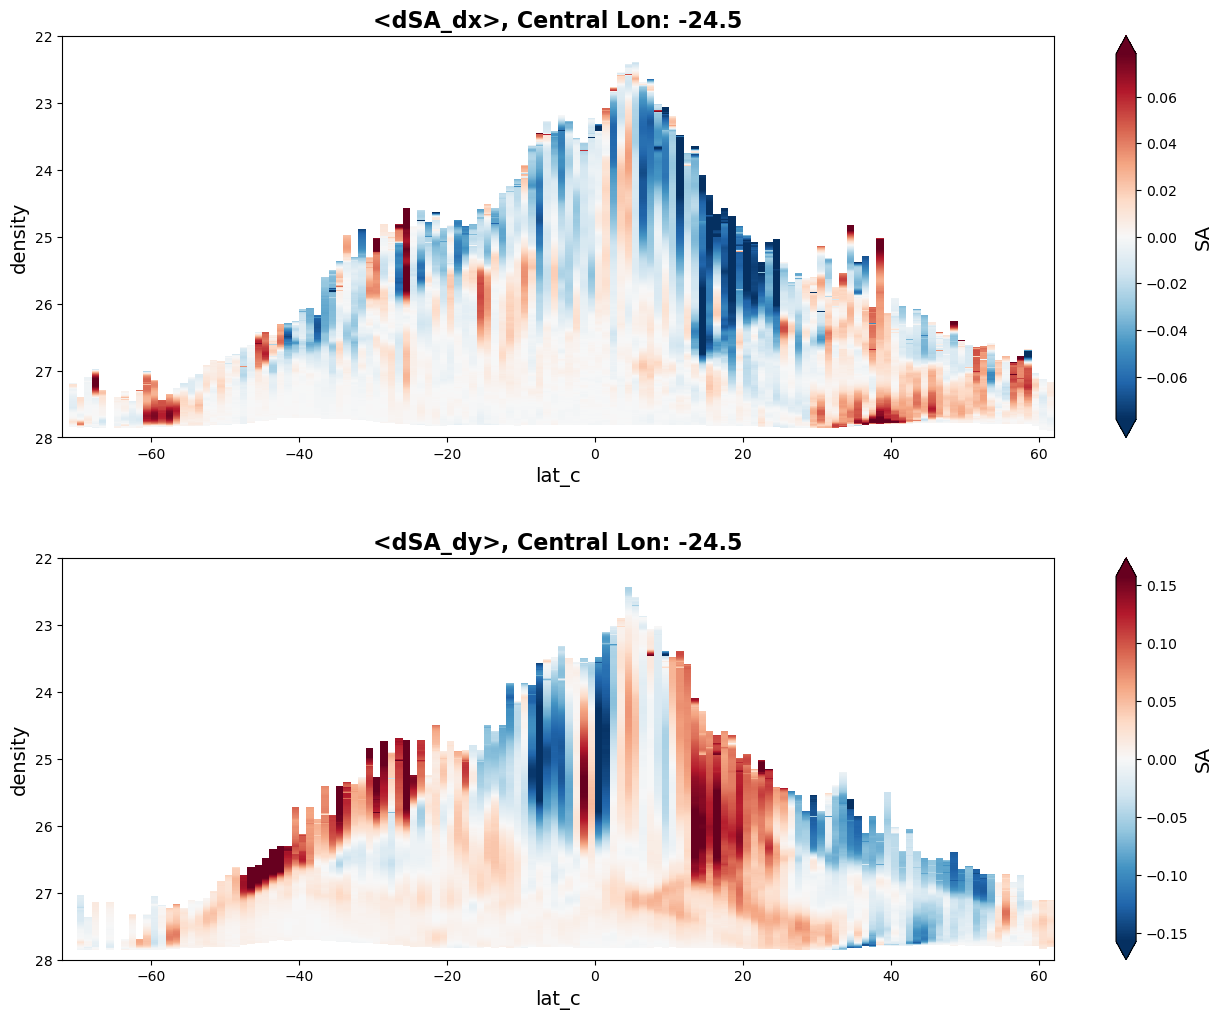

In [402]:
fig=plt.figure(figsize=(16,12))
plt.subplot(211)
dSA_dx.sel(lon_c=lon, method='nearest').plot(x='lat_c',y='density', robust=True)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('<dSA_dx>, Central Lon: {}'.format(dCT_dx.sel(lon_c=lon, method='nearest').lon_c.values))

plt.subplot(212)
dSA_dy.sel(lon_c=lon, method='nearest').plot(x='lat_c',y='density', robust=True)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('<dSA_dy>, Central Lon: {}'.format(dCT_dx.sel(lon_c=lon, method='nearest').lon_c.values))

plt.subplots_adjust(hspace=0.3)

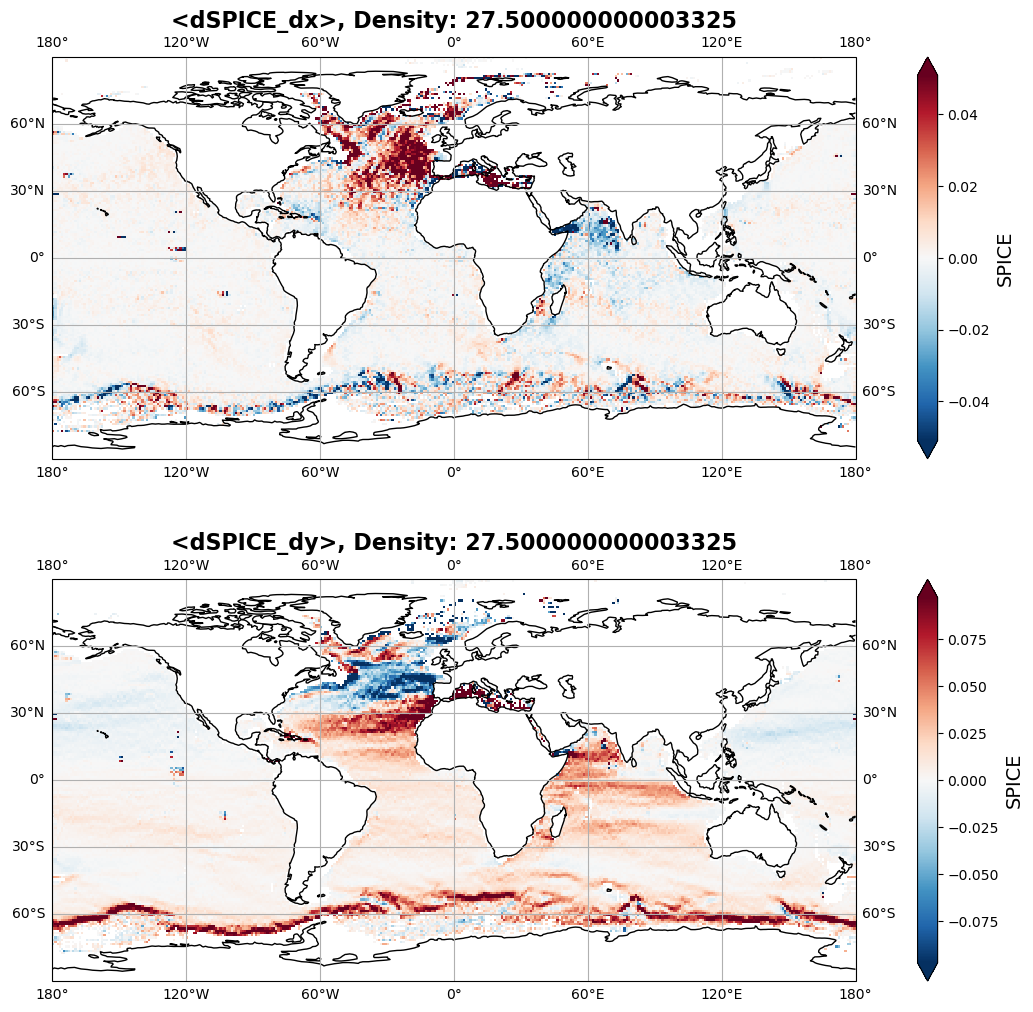

In [250]:
fig=plt.figure(figsize=(16,12))
ax1 = plt.subplot(211, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_global()
dSPICE_dx.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax1,transform=ccrs.PlateCarree(), robust=True)
ax1.set_title('<dSPICE_dx>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

ax2 = plt.subplot(212, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_global()
dSPICE_dy.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax2,transform=ccrs.PlateCarree(), robust=True)
ax2.set_title('<dSPICE_dy>, Density: {}'.format(dCT_dx.sel(density=density, method='nearest').density.values))

plt.subplots_adjust(hspace=0.3)

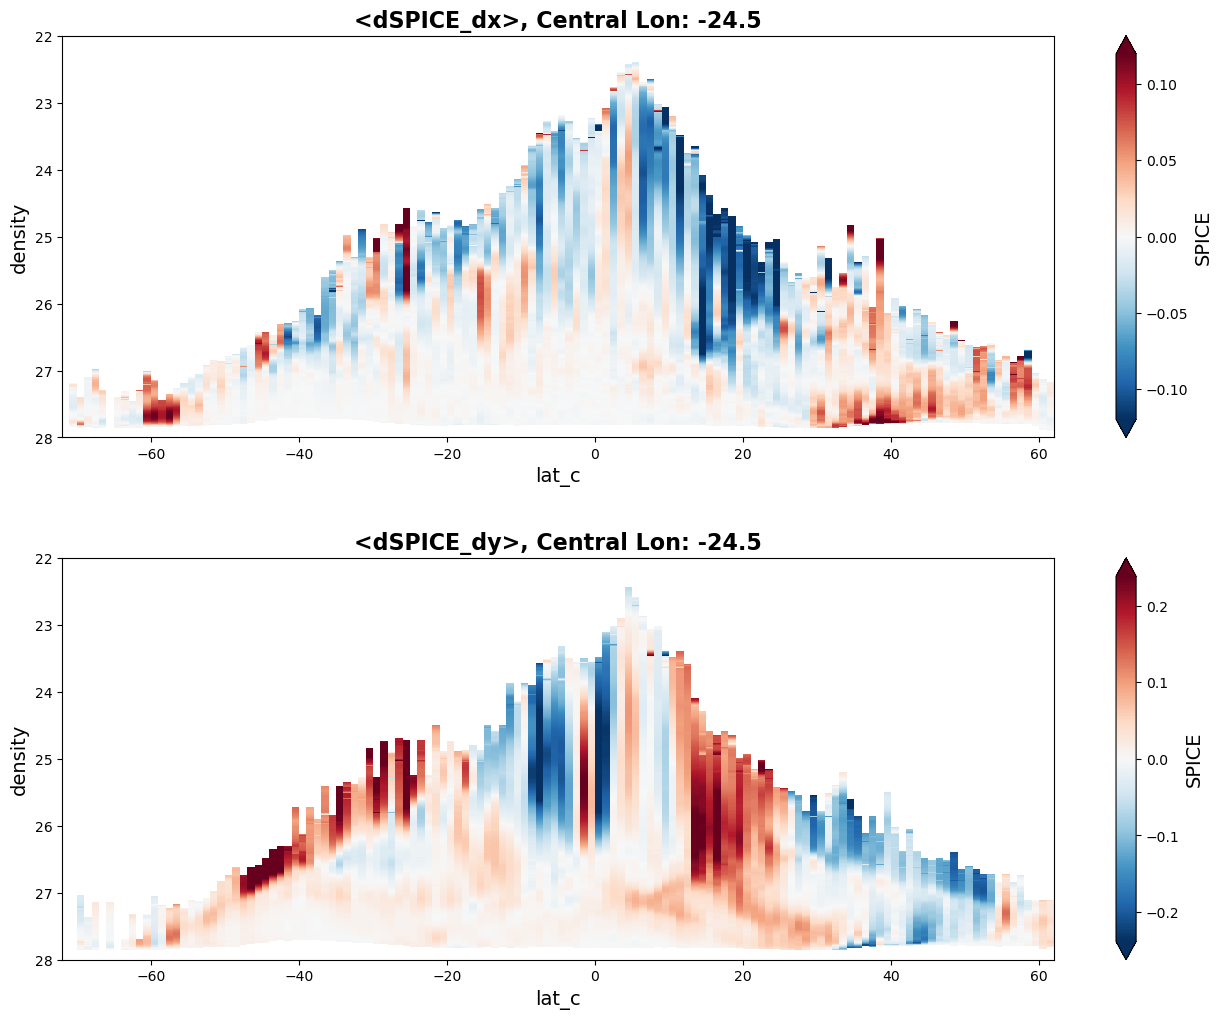

In [403]:
fig=plt.figure(figsize=(16,12))
plt.subplot(211)
dSPICE_dx.sel(lon_c=lon, method='nearest').plot(x='lat_c',y='density', robust=True)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('<dSPICE_dx>, Central Lon: {}'.format(dCT_dx.sel(lon_c=lon, method='nearest').lon_c.values))

plt.subplot(212)
dSPICE_dy.sel(lon_c=lon, method='nearest').plot(x='lat_c',y='density', robust=True)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('<dSPICE_dy>, Central Lon: {}'.format(dCT_dx.sel(lon_c=lon, method='nearest').lon_c.values))

plt.subplots_adjust(hspace=0.3)

# Calculate DSC

In [317]:
def calculate_DSC(ds):
    alpha = gsw.alpha(ds.SA, ds.CT, ds.z_c)
    theta_sig_sig = ds.CT.differentiate(coord='density').differentiate(coord='density')
    
    DSC = 2*alpha*ds.SIG0*theta_sig_sig
    
    ds['DSC'] = (['density', 'lon_c', 'lat_c'], DSC.data)

    return ds

In [318]:
ds_rho = calculate_DSC(ds_rho).compute()

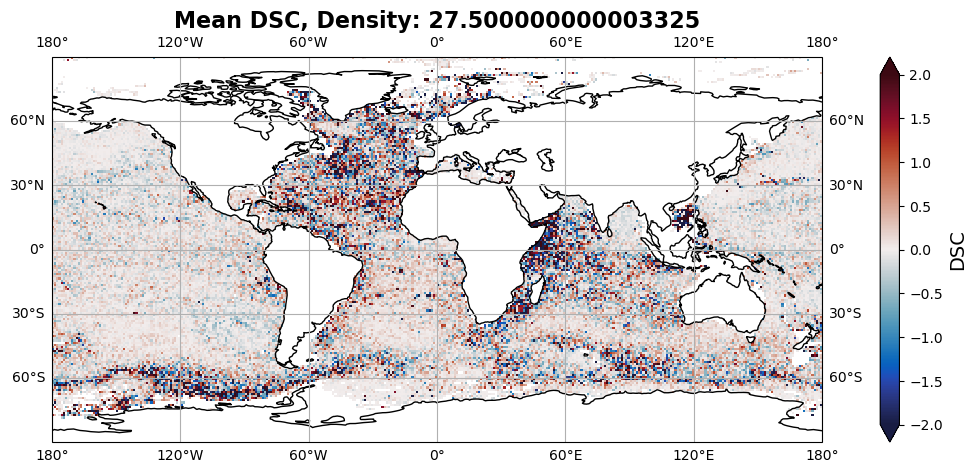

In [319]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_rho.sel(density=density, method='nearest').DSC.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cmo.balance)
ax.set_title('Mean DSC, Density: {}'.format(ds_rho.sel(density=density, method='nearest').density.values));

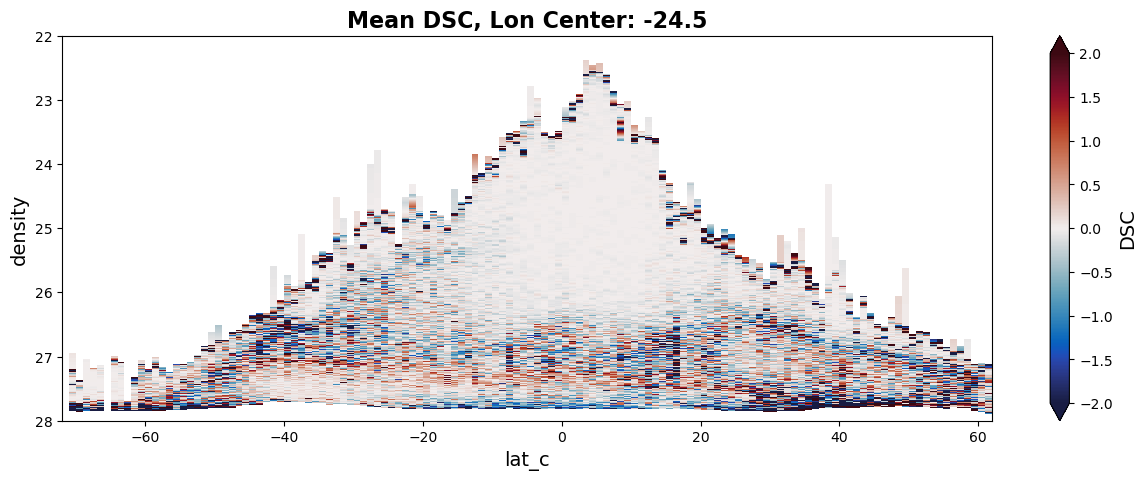

In [406]:
fig=plt.figure(figsize=(15,5))
ds_rho.sel(lon_c=lon, method='nearest').DSC.plot(x='lat_c',y='density', cmap=cmo.balance, vmin=-2, vmax=2)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.ylim(28,22)
plt.title('Mean DSC, Lon Center: {}'.format(ds_sect.lon_c.values));

# Calculate Stability

In [268]:
N2, pmid = gsw.stability.Nsquared(ds_binned.SA, ds_binned.CT, ds_binned.PRES)

In [272]:
Tu, Rrho, pmid = gsw.stability.Turner_Rsubrho(ds_binned.SA, ds_binned.CT, ds_binned.PRES)

In [281]:
new_depth = np.full((1, 360, 180), np.nan)
N2_expand = np.concatenate([N2, new_depth], axis=0)
Tu_expand = np.concatenate([Tu, new_depth], axis=0)

In [288]:
ds_binned['N2'] = (['z_c', 'lon_c', 'lat_c'], N2_expand)
ds_binned['Tu'] = (['z_c', 'lon_c', 'lat_c'], Tu_expand)

In [371]:
ds_binned_sect = ds_binned.sel(lon_c=lon, method='nearest').load()

Text(0.5, 1.0, 'Mean N2, Depth: 1000')

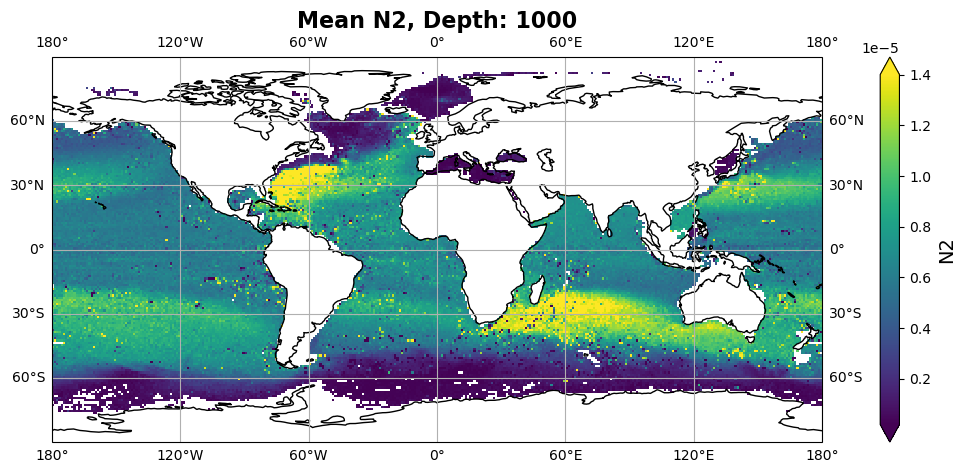

In [332]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_binned.sel(z_c=depth, method='nearest').N2.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), robust=True)
ax.set_title('Mean N2, Depth: {}'.format(depth))

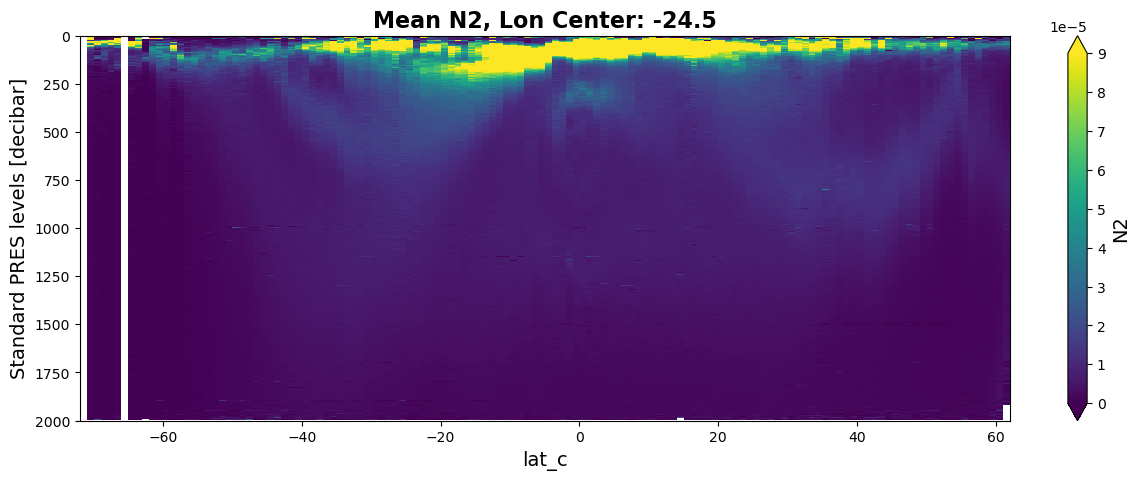

In [382]:
fig=plt.figure(figsize=(15,5))
ds_binned_sect.N2.plot(x='lat_c',y='z_c', vmin=0, vmax=9e-5)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.title('Mean N2, Lon Center: {}'.format(ds_sect.lon_c.values));

In [322]:
bounds = [-100, -90, -45, 45, 90, 100]
norm = colors.BoundaryNorm(bounds, cmap.N)

Text(0.5, 1.0, 'Mean Tu, Depth: 1000')

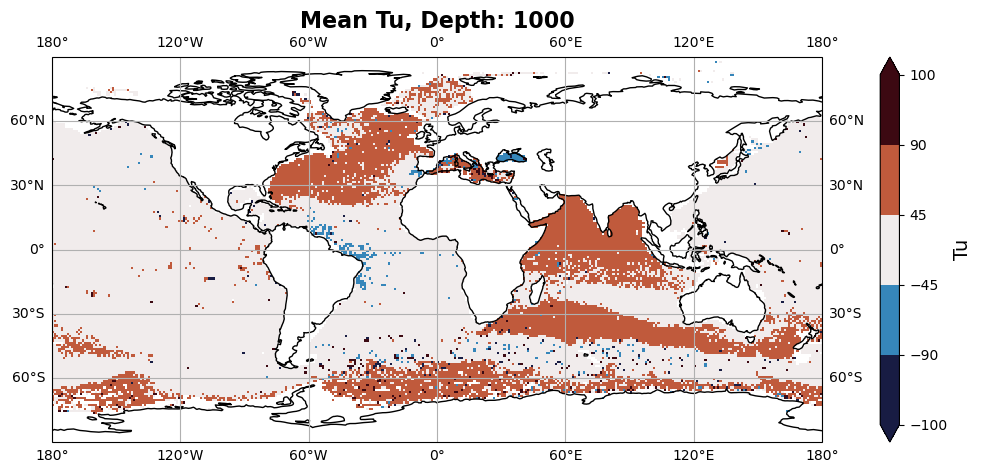

In [331]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ds_binned.sel(z_c=depth, method='nearest').Tu.plot(x='lon_c', y='lat_c', ax=ax, transform=ccrs.PlateCarree(), cmap=cmo.balance, norm=norm)
ax.set_title('Mean Tu, Depth: {}'.format(depth))

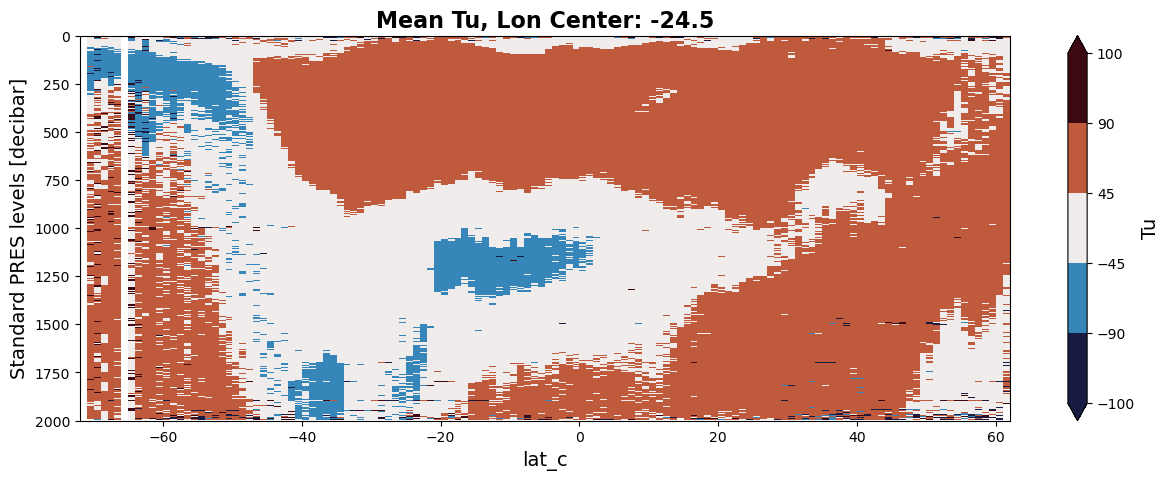

In [381]:
fig=plt.figure(figsize=(15,5))
ds_binned_sect.Tu.plot(x='lat_c',y='z_c', cmap=cmo.balance, norm=norm)
plt.gca().invert_yaxis()
plt.xlim(-72,62)
plt.title('Mean Tu, Lon Center: {}'.format(ds_sect.lon_c.values));